<a href="https://colab.research.google.com/github/FacuML/NLP/blob/main/NLP%20/TP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Web scraping = Musica

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import string

In [2]:
url="https://www.letras.com/playlists/1305578/"

In [3]:
content=requests.get(url)

In [4]:
soup=BeautifulSoup(content.text,'html.parser')

In [ ]:
print(soup)

In [6]:
ul = soup.find("ul", class_="songList-table-content --counter --playlist js-song-list font --base --size16")# Se busca un elemento de una lista

In [7]:
print(ul)

<ul class="songList-table-content --counter --playlist js-song-list font --base --size16"> <li class="songList-table-row --song isVisible" data-artist="Romeo Santos" data-dns="romeo-santos" data-id="2572739" data-name="Propuesta Indecente" data-shareurl="Propuesta+Indecente" data-url="propuesta-indecente"> <a class="songList-table-playButton" href="/romeo-santos/propuesta-indecente/#letras:1305578"> <span class="songList-playButton-icon"></span> </a> <div class="songList-table-songName font --base --size16"><span>Propuesta Indecente</span></div> <div class="songList-table-songArtist"><a href="/romeo-santos/">Romeo Santos</a></div> <div class="songList-table-songOptions"></div> </li> <li class="songList-table-separator"></li> <li class="songList-table-row --song isVisible" data-artist="Romeo Santos" data-dns="romeo-santos" data-id="2881056" data-name="Héroe Favorito" data-shareurl="H%C3%A9roe+Favorito" data-url="heroe-favorito"> <a class="songList-table-playButton" href="/romeo-santos/h

In [8]:
lista=[]

In [9]:
for link in ul.find_all('a'):
    href = link.get('href')
    if href:  # Asegura que exista href
        lista.append(f'https://letras.com{href}')
#Se busca todas las etiquetas queesten en la variable ul y tengan la "a" y se las concadena

In [10]:
print(lista)

['https://letras.com/romeo-santos/propuesta-indecente/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/heroe-favorito/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/imitadora/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/eres-mia/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/x-si-volvemos-part-karol-g/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/mar/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/el-panuelo-part-rosalia/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/1959320/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/1981208/#letras:1305578', 'https://letras.com/romeo-santos/', 'https://letras.com/romeo-santos/cancionistas-de-amor/#letras:1305578', 'https://letras.com

In [11]:
lista=lista[::2]# Se filtra de 2 en 2
print(lista)

['https://letras.com/romeo-santos/propuesta-indecente/#letras:1305578', 'https://letras.com/romeo-santos/heroe-favorito/#letras:1305578', 'https://letras.com/romeo-santos/imitadora/#letras:1305578', 'https://letras.com/romeo-santos/eres-mia/#letras:1305578', 'https://letras.com/romeo-santos/x-si-volvemos-part-karol-g/#letras:1305578', 'https://letras.com/romeo-santos/mar/#letras:1305578', 'https://letras.com/romeo-santos/el-panuelo-part-rosalia/#letras:1305578', 'https://letras.com/romeo-santos/1959320/#letras:1305578', 'https://letras.com/romeo-santos/1981208/#letras:1305578', 'https://letras.com/romeo-santos/cancionistas-de-amor/#letras:1305578', 'https://letras.com/romeo-santos/canalla-part-el-chaval-de-la-bachata/#letras:1305578', 'https://letras.com/romeo-santos/me-extrano-part-christian-nodal/#letras:1305578', 'https://letras.com/romeo-santos/1988092/#letras:1305578', 'https://letras.com/romeo-santos/la-tormenta/#letras:1305578', 'https://letras.com/romeo-santos/bella-y-sensual/#

In [12]:
for i in lista:
    print(i)

https://letras.com/romeo-santos/propuesta-indecente/#letras:1305578
https://letras.com/romeo-santos/heroe-favorito/#letras:1305578
https://letras.com/romeo-santos/imitadora/#letras:1305578
https://letras.com/romeo-santos/eres-mia/#letras:1305578
https://letras.com/romeo-santos/x-si-volvemos-part-karol-g/#letras:1305578
https://letras.com/romeo-santos/mar/#letras:1305578
https://letras.com/romeo-santos/el-panuelo-part-rosalia/#letras:1305578
https://letras.com/romeo-santos/1959320/#letras:1305578
https://letras.com/romeo-santos/1981208/#letras:1305578
https://letras.com/romeo-santos/cancionistas-de-amor/#letras:1305578
https://letras.com/romeo-santos/canalla-part-el-chaval-de-la-bachata/#letras:1305578
https://letras.com/romeo-santos/me-extrano-part-christian-nodal/#letras:1305578
https://letras.com/romeo-santos/1988092/#letras:1305578
https://letras.com/romeo-santos/la-tormenta/#letras:1305578
https://letras.com/romeo-santos/bella-y-sensual/#letras:1305578
https://letras.com/romeo-sant

Se hace un Dataframe con Titulo de la musica y Letra de la musica

In [13]:
data=pd.DataFrame()

In [14]:
lista_titulos_musicas=[]

In [15]:
lista_letras=[]
for item in lista:
  texto_html = requests.get(item).text
  soup = BeautifulSoup(texto_html, "html.parser")
  h1=soup.find("h1",class_="textStyle-primary").getText()
  div=soup.find("div",class_="lyric-original").getText()
  h1=h1.replace("\n"," ")
  div= re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', div)
  lista_titulos_musicas.append(h1)
  lista_letras.append(div)


data["Titulo_de_musica"]=lista_titulos_musicas
data["Letra_de_musica"] = lista_letras
data=data.sort_index()
data.head()

,Titulo_de_musica,Letra_de_musica
0,Propuesta Indecente,Hola Me llaman Romeo Es un placer conocerla Q...
1,Héroe Favorito,Estoy planeando un secuestro Para robarme tu ...
2,Imitadora,Hey Who are you?Mi memoria ha conservado lo q...
3,Eres Mía,Ya me han informado Que tu novio es un insípi...
4,X SI VOLVEMOS (part. KAROL G),"No funcionamos Lo dimo' todo, pero no se nos ..."


#2. *Limpieza de texto*

In [16]:
# Defino una funcion que recibe un texto y devuelve el mismo texto sin singnos,
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)

    return text

In [17]:
clean=lambda x: clean_text_round1(x)

data['Letra_de_musica'] = data["Letra_de_musica"].apply(clean)

In [18]:
data

,Titulo_de_musica,Letra_de_musica
0,Propuesta Indecente,hola me llaman romeo es un placer conocerla q...
1,Héroe Favorito,estoy planeando un secuestro para robarme tu ...
2,Imitadora,hey who are you mi memoria ha conservado lo q...
3,Eres Mía,ya me han informado que tu novio es un insípi...
4,X SI VOLVEMOS (part. KAROL G),no funcionamos lo dimo todo pero no se nos ...
5,Mar,voy a hacerle una autopsia a mi corazón ya qu...
6,El Pañuelo (part. ROSALÍA),mi cantar mi canto es un lamento ay porque ...
7,Promise (part. Usher),he perdido el balance por tu amor en tus mano...
8,Que Se Mueran,yes sir keep it locked andan murmurando que l...
9,Cancioncitas de Amor,your official love station baby baby how lo...


In [19]:
def clean_text_round2(text):
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

In [20]:
clean2=lambda x: clean_text_round2(x)

data['Letra_de_musica'] = data["Letra_de_musica"].apply(clean2)

In [21]:
data['Letra_de_musica'][0]

' hola me llaman romeo es un placer conocerla qué bien te ves te adelanto  no me importa quién sea él dígame usted si ha hecho algo travieso alguna vez una aventura es más divertida si huele a peligro y si te invito a una copa y me acerco a tu boca si te robo un besito  a ver  ¿te enojas conmigo ¿qué dirías si esta noche te seduzco en mi coche que se empañen los vidrios y la regla es que goces si te falto el respeto y luego culpo al alcohol si levanto tu falda  ¿me darías el derecho a medir tu sensatez  poner en juego tu cuerpo si te parece prudente esta propuesta indecente a ver  a ver permíteme apreciar tu desnudez  take it off relájate que este martini calmará tu timidez  don t be shy una aventura es más divertida si huele a peligro y si te invito a una copa y me acerco a tu boca si te robo un besito  a ver  te enojas conmigo¿qué dirías si esta noche te seduzco en mi coche que se empañen los vidrios y la regla es que goces si te falto el respeto y luego culpo al alcohol si levanto t

In [22]:
#from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))
#lines = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
aderir_stop_words =["ow","i","and","ay","the","s","ah"]

In [24]:
palabras_importantes = []
stopwords_es.update(aderir_stop_words)
for letra in data['Letra_de_musica']:
        palabras = letra.split()
        importantes = [p.lower() for p in palabras if p.lower() not in stopwords_es]
        palabras_importantes.append(' '.join(importantes))
print(palabras_importantes)

['hola llaman romeo placer conocerla bien ves adelanto importa quién dígame usted si hecho travieso alguna vez aventura divertida si huele peligro si invito copa acerco boca si robo besito ver ¿te enojas conmigo ¿qué dirías si noche seduzco coche empañen vidrios regla goces si falto respeto luego culpo alcohol si levanto falda ¿me darías derecho medir sensatez poner juego cuerpo si parece prudente propuesta indecente ver ver permíteme apreciar desnudez take it off relájate martini calmará timidez don t be shy aventura divertida si huele peligro si invito copa acerco boca si robo besito ver enojas conmigo¿qué dirías si noche seduzco coche empañen vidrios regla goces si falto respeto luego culpo alcohol si levanto falda ¿me darías derecho medir sensatez poner juego cuerpo si parece prudente propuesta indecente m back it feels good to be king gostoso hey listen know what you like how about if you you bailamos bachata luego you you terminamo cama rico how about if you you bailamos bachata 

#  3. Treinta World Cloud de las 30 canciones

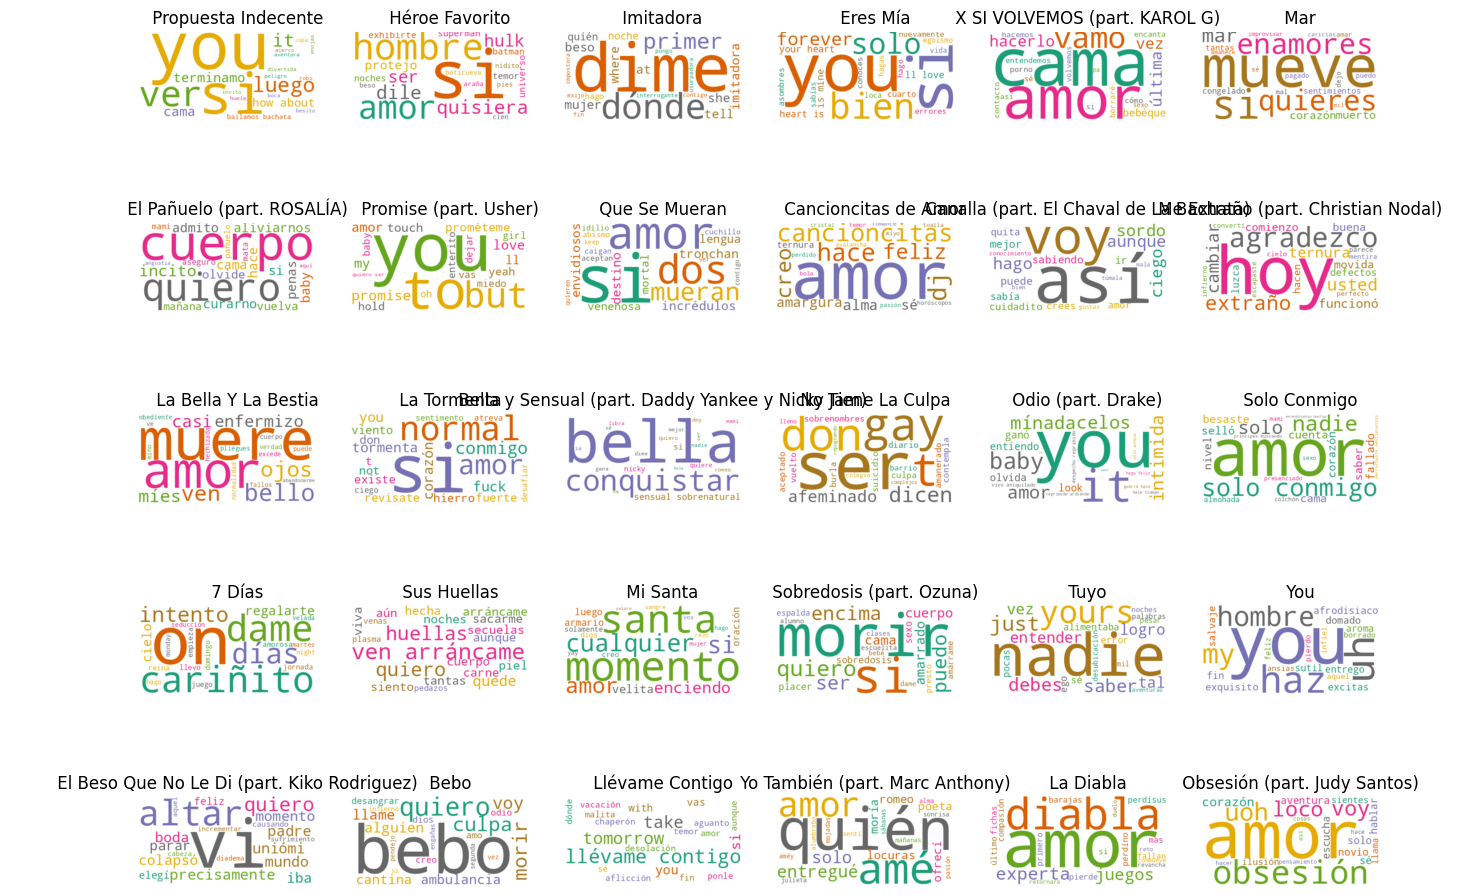

In [25]:
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=stopwords_es, background_color="white", colormap="Dark2",
               max_font_size=150, max_words=20, random_state=42)

plt.rcParams['figure.figsize'] = [16,12] # tamanio de los plots

# Para cada anio creo un WC
for i in range (30):
    wc.generate(data['Letra_de_musica'][i])  # aca le pido que genere los WC a partir del texto de cada anio
    plt.subplot(5, 6, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data['Titulo_de_musica'][i])
plt.show()

#4. Tokenization - Lemmatization - Tagging - Parsing - Entity recognition

Pippeline:
1. Input text
Es el texto crudo que vos le pasás al modelo

2. Tokenization (Tokenización)
Divide el texto en unidades mínimas llamadas tokens: palabras, signos de puntuación, números, etc.

3. Lemmatization (Lematización)
Convierte cada palabra a su forma base o lema.

    Ejemplo:

    "jugó" → "jugar"

    "años" → "año"

    Esto es útil para reducir la variabilidad del lenguaje y agrupar palabras similares.

4. Tagging (Etiquetado gramatical / POS Tagging)
Asigna a cada token su categoría gramatical:

    sustantivo (NOUN)

    verbo (VERB)

    adjetivo (ADJ)

    etc.

5. Parsing (Análisis sintáctico / dependencias)
Analiza cómo se relacionan las palabras entre sí en una oración. Crea un árbol de dependencias.

    Ejemplo:

    "jugó" es el verbo principal

    "Messi" es el sujeto

    "Barcelona" es el objeto

    Esto permite entender la estructura de la oración.

6. Entity recognition (Reconocimiento de entidades)
Detecta entidades nombradas: personas, lugares, fechas, organizaciones, etc.

    Ejemplo:

    "Messi" → PERSONA

    "Barcelona" → ORGANIZACIÓN o LUGAR

7. Doc Object
Al final, spaCy devuelve un objeto Doc, que contiene toda esta información junta para que vos puedas acceder fácilmente a:

    _tokens_

    _lemas_

    _etiquetas gramaticales_

    _entidades_

    _relaciones sintácticas_

In [26]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [27]:
texto_total = ' '.join(palabras_importantes)

In [28]:
import spacy
import es_core_news_lg

In [29]:
nlp=spacy.load("es_core_news_lg")
import es_core_news_lg
nlp=es_core_news_lg.load()

In [30]:
doc=nlp(texto_total)

In [31]:
print(doc)

hola llaman romeo placer conocerla bien ves adelanto importa quién dígame usted si hecho travieso alguna vez aventura divertida si huele peligro si invito copa acerco boca si robo besito ver ¿te enojas conmigo ¿qué dirías si noche seduzco coche empañen vidrios regla goces si falto respeto luego culpo alcohol si levanto falda ¿me darías derecho medir sensatez poner juego cuerpo si parece prudente propuesta indecente ver ver permíteme apreciar desnudez take it off relájate martini calmará timidez don t be shy aventura divertida si huele peligro si invito copa acerco boca si robo besito ver enojas conmigo¿qué dirías si noche seduzco coche empañen vidrios regla goces si falto respeto luego culpo alcohol si levanto falda ¿me darías derecho medir sensatez poner juego cuerpo si parece prudente propuesta indecente m back it feels good to be king gostoso hey listen know what you like how about if you you bailamos bachata luego you you terminamo cama rico how about if you you bailamos bachata ba

In [32]:
palabras_claves=[]

In [33]:
for token in doc:
  if token.is_alpha and not token.is_stop:# si token es alpha numerico y no tiene stopwords.
    palabras_claves.append(token.lemma_.lower())
print(palabras_claves)

['hola', 'llamar', 'romeo', 'placer', 'conocer él', 'ver', 'adelanto', 'importar', 'dígame', 'travieso', 'aventura', 'divertido', 'oler', 'peligro', 'invitar', 'copa', 'acerco', 'boca', 'robo', 'besito', 'enojar', 'diriar', 'noche', 'seduzco', 'coche', 'empañar', 'vidrio', 'reglo', 'goz', 'faltar', 'respeto', 'culpar', 'alcohol', 'levantar', 'falda', 'dariar', 'derecho', 'medir', 'sensatez', 'juego', 'cuerpo', 'prudente', 'propuesta', 'indecente', 'permíteme', 'apreciar', 'desnudez', 'take', 'it', 'off', 'relájate', 'martini', 'calmar', 'timidez', 'don', 't', 'be', 'shy', 'aventura', 'divertido', 'oler', 'peligro', 'invitar', 'copa', 'acerco', 'boca', 'robo', 'besito', 'enoja', 'dirías', 'noche', 'seduzco', 'coche', 'empañar', 'vidrio', 'reglo', 'goz', 'faltar', 'respeto', 'culpar', 'alcohol', 'levantar', 'falda', 'dariar', 'derecho', 'medir', 'sensatez', 'juego', 'cuerpo', 'prudente', 'propuesta', 'indecente', 'm', 'back', 'it', 'feels', 'good', 'to', 'be', 'king', 'gostoso', 'hey', '

In [ ]:
for token in doc:
  print(f"{token.text}-> {token.lemma_} {token.pos_,} ({spacy.explain(token.dep_)} -> {token.head})")

#5. Un World Cloud con las palabras mas usadas en las 30 musicas de Romeo Santos


In [35]:
from collections import Counter

In [36]:
frecuencia_palabras=Counter(palabras_claves)

In [37]:
N=20
palabras_mas_frecuentes=frecuencia_palabras.most_common(N)
print(palabras_mas_frecuentes)

[('amor', 100), ('you', 98), ('querer', 53), ('ver', 35), ('morir', 32), ('cuerpo', 23), ('cama', 22), ('baby', 22), ('perder', 20), ('corazón', 19), ('king', 18), ('amar', 18), ('romeo', 17), ('noche', 17), ('it', 17), ('your', 15), ('love', 15), ('dejar', 15), ('hombre', 14), ('mujer', 14)]


In [38]:
for palabra, frecuencia in palabras_mas_frecuentes:
  print(f"{palabra} -> {frecuencia}")

amor -> 100
you -> 98
querer -> 53
ver -> 35
morir -> 32
cuerpo -> 23
cama -> 22
baby -> 22
perder -> 20
corazón -> 19
king -> 18
amar -> 18
romeo -> 17
noche -> 17
it -> 17
your -> 15
love -> 15
dejar -> 15
hombre -> 14
mujer -> 14


In [39]:
world_cloud=WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=20,
    stopwords=None,
    collocations=False).generate_from_frequencies(frecuencia_palabras)

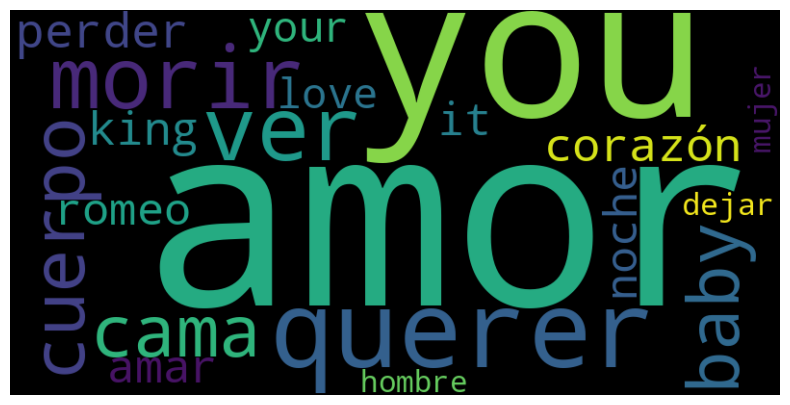

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 6. BoW

1. CountVectorizer
Convierte una colección de documentos de texto en una matriz de conteo de palabras (bag of words).

    📌 ¿Cómo funciona?

    Cada fila = un documento.

    Cada columna = una palabra única del corpus.

    El valor en la celda = cuántas veces aparece esa palabra en ese documento.

2. TfidfTransformer
Convierte la matriz de conteo anterior en una matriz TF-IDF (Term Frequency – Inverse Document Frequency).

    📌 ¿Para qué sirve?

    Penaliza las palabras muy comunes (como "el", "y") y resalta las más informativas.

    Da más peso a palabras relevantes para un documento y menos a las que aparecen en todos.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [42]:
count_vec=CountVectorizer()

In [43]:
doc_esp_vec=count_vec.fit_transform(data['Letra_de_musica'])

In [ ]:
count_vec.vocabulary_


In [45]:
doc_esp_vec[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [46]:
pal_vec=count_vec.get_feature_names_out()
pd_vec=pd.DataFrame(doc_esp_vec.toarray(), columns=pal_vec)

In [ ]:
print(pd_vec)

In [ ]:
pd_vec.head().transpose()

#7. *_Analisis de palabras_*

Cuantos verbos, sustantivos y adjetivos hay en cada cancion?

In [49]:
def contar_pos_por_cancion(data):
    verbos_list = []
    sustantivos_list = []
    adjetivos_list = []

    for letra in data['Letra_de_musica']:
        doc = nlp(letra)

        verbos = sum(1 for token in doc if token.pos_ == "VERB")
        sustantivos = sum(1 for token in doc if token.pos_ == "NOUN")
        adjetivos = sum(1 for token in doc if token.pos_ == "ADJ")

        verbos_list.append(verbos)
        sustantivos_list.append(sustantivos)
        adjetivos_list.append(adjetivos)

    # Agregamos como nuevas columnas
    data['Cantidad_verbos'] = verbos_list
    data['Cantidad_sustantivos'] = sustantivos_list
    data['Cantidad_adjetivos'] = adjetivos_list

    return data

In [50]:
contar_pos_por_cancion(data)

,Titulo_de_musica,Letra_de_musica,Cantidad_verbos,Cantidad_sustantivos,Cantidad_adjetivos
0,Propuesta Indecente,hola me llaman romeo es un placer conocerla q...,51,51,11
1,Héroe Favorito,estoy planeando un secuestro para robarme tu ...,28,71,12
2,Imitadora,hey who are you mi memoria ha conservado lo q...,44,57,21
3,Eres Mía,ya me han informado que tu novio es un insípi...,37,48,20
4,X SI VOLVEMOS (part. KAROL G),no funcionamos lo dimo todo pero no se nos ...,56,54,14
5,Mar,voy a hacerle una autopsia a mi corazón ya qu...,50,34,7
6,El Pañuelo (part. ROSALÍA),mi cantar mi canto es un lamento ay porque ...,58,59,10
7,Promise (part. Usher),he perdido el balance por tu amor en tus mano...,43,52,9
8,Que Se Mueran,yes sir keep it locked andan murmurando que l...,48,54,17
9,Cancioncitas de Amor,your official love station baby baby how lo...,50,97,19


Cuales son los verbos, sustantivos y adjetivos mas usados? en cada musica.

In [51]:
def analizar_verbos_sustantivos(data):
    verbos_por_cancion = []
    sustantivos_por_cancion = []
    adjetivos_por_cancion = []
    for letra in data['Letra_de_musica']:
        doc = nlp(letra)
        verbos = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
        sustantivos = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
        adjetivos = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]

        # Guardamos los más frecuentes (puede cambiar el top según necesidad)
        verbos_por_cancion.append(Counter(verbos).most_common(3))
        sustantivos_por_cancion.append(Counter(sustantivos).most_common(3))
        adjetivos_por_cancion.append(Counter(adjetivos).most_common(3))

    # Agregamos las listas como nuevas columnas
    data["Verbos_mas_usados"] = verbos_por_cancion
    data["Sustantivos_mas_usados"] = sustantivos_por_cancion
    data["Adjetivos_mas_usados"] = adjetivos_por_cancion

    return data

In [52]:
analizar_verbos_sustantivos(data)

,Titulo_de_musica,Letra_de_musica,Cantidad_verbos,Cantidad_sustantivos,Cantidad_adjetivos,Verbos_mas_usados,Sustantivos_mas_usados,Adjetivos_mas_usados
0,Propuesta Indecente,hola me llaman romeo es un placer conocerla q...,51,51,11,"[(ver, 5), (bailar, 3), (oler, 2)]","[(bachata, 3), (cama, 3), (aventura, 2)]","[(divertido, 2), (goz, 2), (prudente, 2)]"
1,Héroe Favorito,estoy planeando un secuestro para robarme tu ...,28,71,12,"[(querer, 4), (dilar, 4), (preguntar, 3)]","[(hombre, 5), (amor, 4), (hulk, 3)]","[(favorito, 3), (solo, 2), (vivo, 1)]"
2,Imitadora,hey who are you mi memoria ha conservado lo q...,44,57,21,"[(hacer, 5), (poner, 2), (exigir, 2)]","[(beso, 3), (mujer, 3), (s, 3)]","[(primero, 4), (imitadoro, 3), (extraño, 2)]"
3,Eres Mía,ya me han informado que tu novio es un insípi...,37,48,20,"[(decir, 5), (asombrar, 3), (hacer, 3)]","[(noche, 3), (cuarto, 3), (error, 3)]","[(mío, 4), (solo, 4), (love, 4)]"
4,X SI VOLVEMOS (part. KAROL G),no funcionamos lo dimo todo pero no se nos ...,56,54,14,"[(hacer, 4), (hacer él, 3), (bebécar, 3)]","[(amor, 6), (cama, 6), (vez, 3)]","[(último, 3), (destendida, 1), (puesto, 1)]"
5,Mar,voy a hacerle una autopsia a mi corazón ya qu...,50,34,7,"[(mover, 8), (tener, 4), (querer, 3)]","[(mar, 3), (corazón, 2), (sentimiento, 2)]","[(congelado, 2), (muerto, 1), (llamativo, 1)]"
6,El Pañuelo (part. ROSALÍA),mi cantar mi canto es un lamento ay porque ...,58,59,10,"[(querer, 4), (incitar, 3), (aliviar yo, 3)]","[(cuerpo, 5), (pena, 3), (cama, 3)]","[(papi, 3), (enamorado, 1), (destrozado, 1)]"
7,Promise (part. Usher),he perdido el balance por tu amor en tus mano...,43,52,9,"[(tener, 5), (querer, 5), (tuyo, 4)]","[(amor, 4), (girl, 4), (miedo, 4)]","[(heart, 3), (condenado, 1), (feliz, 1)]"
8,Que Se Mueran,yes sir keep it locked andan murmurando que l...,48,54,17,"[(querer, 4), (tener, 4), (morir, 3)]","[(amor, 4), (incrédulo, 3), (envidioso, 3)]","[(venenós, 3), (mortal, 3), (correcto, 2)]"
9,Cancioncitas de Amor,your official love station baby baby how lo...,50,97,19,"[(sonar, 4), (caer, 4), (hacer, 4)]","[(amor, 13), (cancioncita, 4), (alma, 3)]","[(feliz, 3), (azul, 3), (zul, 3)]"


La distribucion gramatical de 1 de las 30 canciones (Correr el codigo, para seleccionar el puesto de la musica y que te muestre la distribucion)

Ingrese el top de la cancion que desea analizar: 26


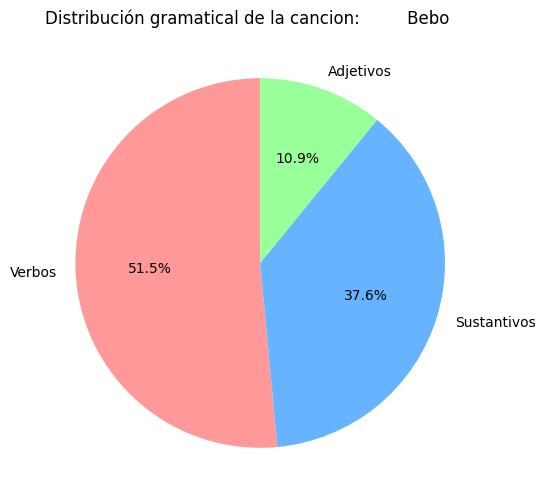

In [53]:
top=int(input("Ingrese el top de la cancion que desea analizar: "))
cancion = data.loc[top-1]  # Por ejemplo la primera canción
valores = [cancion['Cantidad_verbos'], cancion['Cantidad_sustantivos'], cancion['Cantidad_adjetivos']]
etiquetas = ['Verbos', 'Sustantivos', 'Adjetivos']

plt.figure(figsize=(6,6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
Titulo=cancion['Titulo_de_musica']
plt.title(f"Distribución gramatical de la cancion:{Titulo}")
plt.show()